# Adult Census Income Prediction ⚡

# **Probelem Framing**
* The Goal is to predict whether a person has an income of more than 50K a year or not.
*This is basically a binary classification problem where a person is classified into the 50K group or <=50K group.


## Step: 1 Load the nescessary Libraries.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

## Step: 2 Data Extraction.

In [2]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Practice Projects/Ineuron/Adult Census Income Prediction/dataset.csv")

## Step:3 Exploratory Data Analysis.

In [3]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Observation:
* The dataset has 32561 rows and 15 columns.
* The columns are:
    * age: The age of the person.
    * workclass: The type of work the person does.
    * education: The highest level of education the person has attained.
    * educationno: The number of years of education the person has completed.
    * maritalstatus: The marital status of the person.
    * occupation: The occupation of the person.
    * relationship: The relationship of the person to the head of the household.
    * race: The race of the person.
    * sex: The sex of the person.
    * capitalgain: The capital gain the person has received.
    * capitalloss: The capital loss the person has incurred.
    * hoursperweek: The number of hours the person works per week.
    * native: The native country of the person.
    * Salary: Whether the person has an income of more than 50K a year or not.
    * **Understanding the problem statement and the data, Here I am decided to use classification algorithm to find solution.**

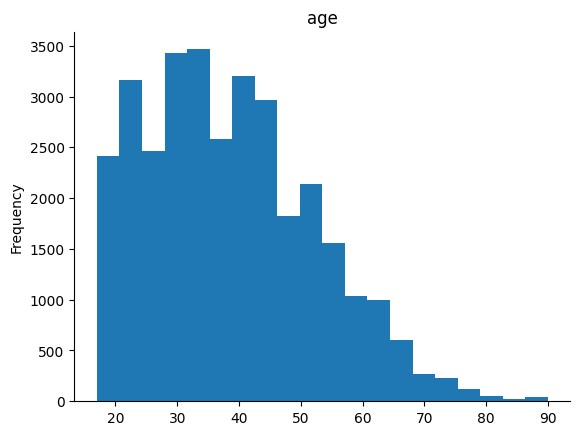

In [4]:
# @title age

from matplotlib import pyplot as plt
data['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)


**Observation:**
* The distribution of age is skewed to the right, with most people being in the 20-40 age range.
* There is a small number of people who are over 80 years old.

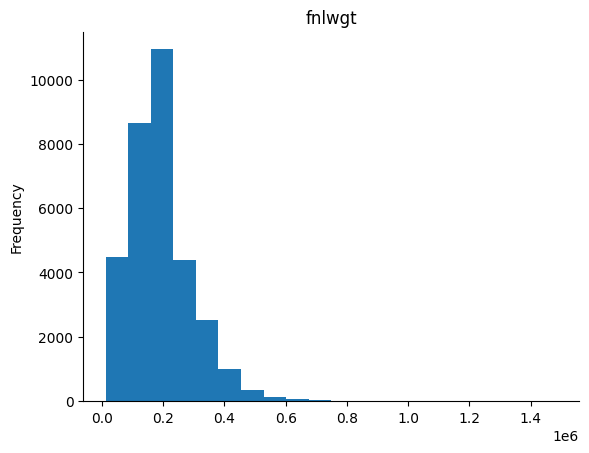

In [5]:
# @title fnlwgt

from matplotlib import pyplot as plt
data['fnlwgt'].plot(kind='hist', bins=20, title='fnlwgt')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [6]:
# prompt: Write observation for above plot.



In [7]:
data.shape

(32561, 15)

In [8]:
# prompt: Using data frame data, write observation for above table




* There are missing values in the workclass, occupation, and native columns.
* The target variable is Salary, which is a binary variable with values of 0 and 1.


SyntaxError: invalid syntax (<ipython-input-8-85044c45d329>, line 6)

In [ ]:
# prompt: Using dataframe data: write observation for above tabel

# T
# The age of the individuals ranges from 17 to 90 years, with a mean of 38.58 and a standard deviation of 13 years.
# The majority of the individuals are between the ages of 25 and 54 years.
# The most common workclass is "Private" (22696 individuals), followed by "Self-emp-not-inc" (2541 individuals) and "Local-gov" (2093 individuals).
# The average

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Observation:
* The data frame contains information on 32561 individuals.
* The shape of the dataFrame is (32561, 15).
* There are no null values in dataframe.

In [ ]:
# prompt: convert salary into currency format

data['salary'] = data['salary'].apply(lambda x: '${:,.2f}'.format(x))


ValueError: Unknown format code 'f' for object of type 'str'

In [ ]:
data.shape

(32561, 15)

In [ ]:
# Finding the unique values from the all columns.

for column in data.columns:
  unique_values = data[column].unique()
  print(f"Unique values for column '{column}': {unique_values}", end="\n")

  print("-------------------------------------------------------------------------------------------------------------")
  print()

Unique values for column 'age': [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
-------------------------------------------------------------------------------------------------------------

Unique values for column 'workclass': [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
-------------------------------------------------------------------------------------------------------------

Unique values for column 'fnlwgt': [ 77516  83311 215646 ...  34066  84661 257302]
-------------------------------------------------------------------------------------------------------------

Unique values for column 'education': [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof

In [ ]:
data.nunique()


age                  73
workclass             9
fnlwgt            21648
education            16
education_num        16
marital_status        7
occupation           15
relationship          6
race                  5
sex                   2
capital_gain        119
capital_loss         92
hours_per_week       94
country              42
salary                2
dtype: int64